In [1]:
from sklearn.manifold import MDS
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

import sys
sys.path.append('../')
import util

## MDS

We use [Multidimensional Scaling](https://blog.csdn.net/AI_BigData_wh/article/details/78242052) to extract feature vector.  We implement it in Three-dimensional. We only load 500 good and 50 bad. 

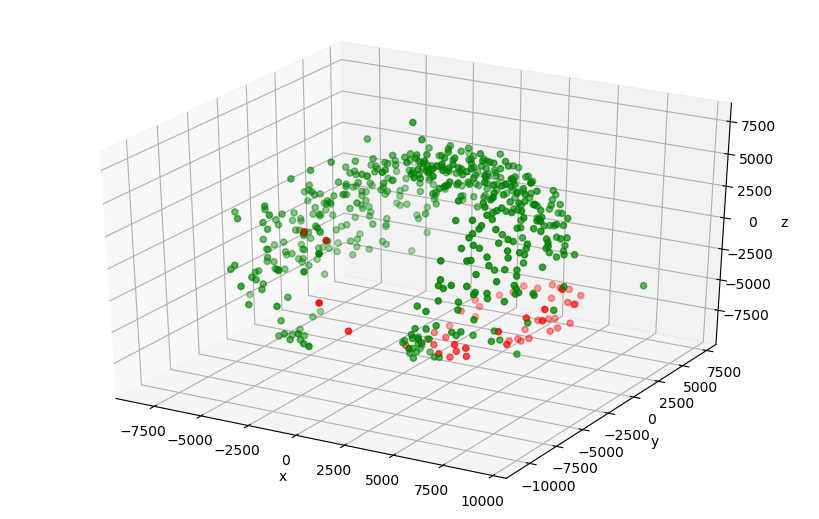

In [7]:
good_num = 500
data_origin, num_good, num_bad = util.load_data(good_num)
data_origin, length = util.resample(data_origin, 600)
data = np.zeros((len(data_origin), 600 * 3))
for i in range(len(data_origin)):
    data[i, :] = data_origin[i].reshape(-1)

mds = MDS(n_components=3, dissimilarity="euclidean")
pos = mds.fit_transform(data)

fig = plt.figure(figsize=(8, 5), dpi= 100)
ax = Axes3D(fig)
ax.scatter(pos[:good_num, 0], pos[:good_num, 1], pos[:good_num, 2], c='g')
ax.scatter(pos[good_num:, 0], pos[good_num:, 1], pos[good_num:, 2], c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## KNN

We use [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) to fit the feature vector we extracted

In [8]:
# prepare data
labels = np.array([1]*(len(pos)-50)+[0]*50,dtype=np.int)
train_x = pos[10:-10, :]
train_y = labels[10:-10]
test_x = np.vstack((pos[:10, :], pos[-10:, :]))
test_y = np.hstack((labels[:10], labels[-10:]))

# KNN
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance')
neigh.fit(train_x, train_y)
neigh.score(test_x, test_y)

0.6